In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
factory_data = pd.read_csv("")

In [90]:
df = pd.read_excel('candydistributors.xlsx', sheet_name='candydistributor' )
df['count'] = 1
df.columns

Index(['rowid', 'distances', 'customerid', 'orderid', 'orderdate', 'orderyear',
       'ordermonth', 'shipdate', 'shipyear', 'shipmonth', 'deliverytime',
       'countryregion', 'stateprovince', 'postalcode', 'lat', 'lng', 'stateid',
       'statename', 'countyfips', 'countyname', 'latitude', 'longitude',
       'factory', 'productname', 'productid', 'division', 'units', 'unitcost',
       'unitprice', 'cost', 'grossprofit', 'rangeprofit', 'sales', 'rangsales',
       'distancetype', 'shipmode', 'region', 'city', 'populationtype',
       'population', 'count'],
      dtype='object')

In [91]:
# Convertir la colonne 'orderdate' en type datetime
df['orderdate'] = pd.to_datetime(df['orderdate'])

df['year'] = df['orderdate'].dt.year
df['month'] = df['orderdate'].dt.month

df['month_name'] = df['orderdate'].dt.month_name()

df = df.sort_values(by='month', ascending=True)

In [92]:
df['orderyear'] = df['orderyear'].astype(str)
pivot = df.pivot_table(
    values='grossprofit',  
    index='orderyear',     
    columns='factory',     
    aggfunc='mean'         
)
pivot = pivot.round(2)
pivot

factory,Lot's O' Nuts,Secret Factory,Sugar Shack,The Other Factory,Wicked Choccy's
orderyear,,,,,
2021,9.08,20.90,4.54,0.92,8.70
2022,9.23,15.23,2.98,1.05,8.82
2023,9.43,23.68,3.47,2.16,8.58
2024,9.21,18.56,3.75,1.87,8.68


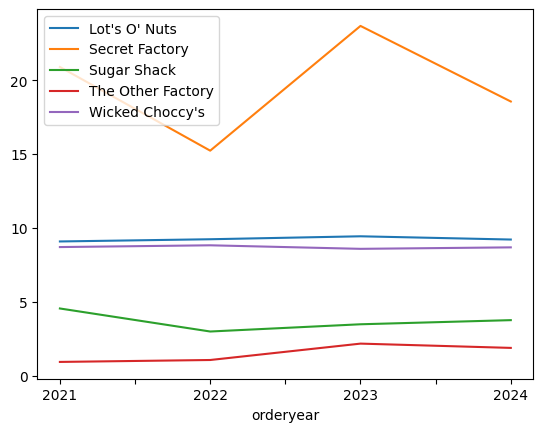

In [93]:
pivot.plot()
plt.legend()

In [94]:
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Convertir 'month_name' en catégorie avec un ordre spécifique
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

df['orderyear'] = df['orderyear'].astype(str)
pivot = df.pivot_table(
    values='count',  
    index='orderyear',     
    columns='month_name',     
    aggfunc='sum'         
)
pivot = pivot.round(2)
pivot

/tmp/ipykernel_971/255154774.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


month_name,January,February,March,April,May,June,July,August,September,October,November,December
orderyear,,,,,,,,,,,,
2021,61,40,132,113,118,118,113,131,234,138,267,253
2022,54,57,123,126,127,109,110,129,245,137,269,278
2023,83,71,153,146,184,171,168,149,317,169,307,305
2024,126,95,203,182,215,211,197,183,381,266,394,391


<Axes: xlabel='month_name'>

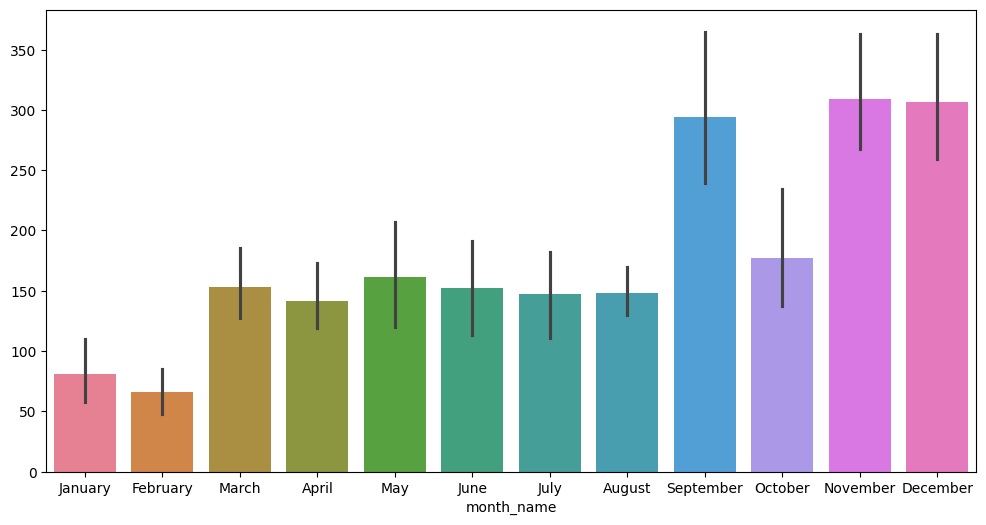

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(pivot)


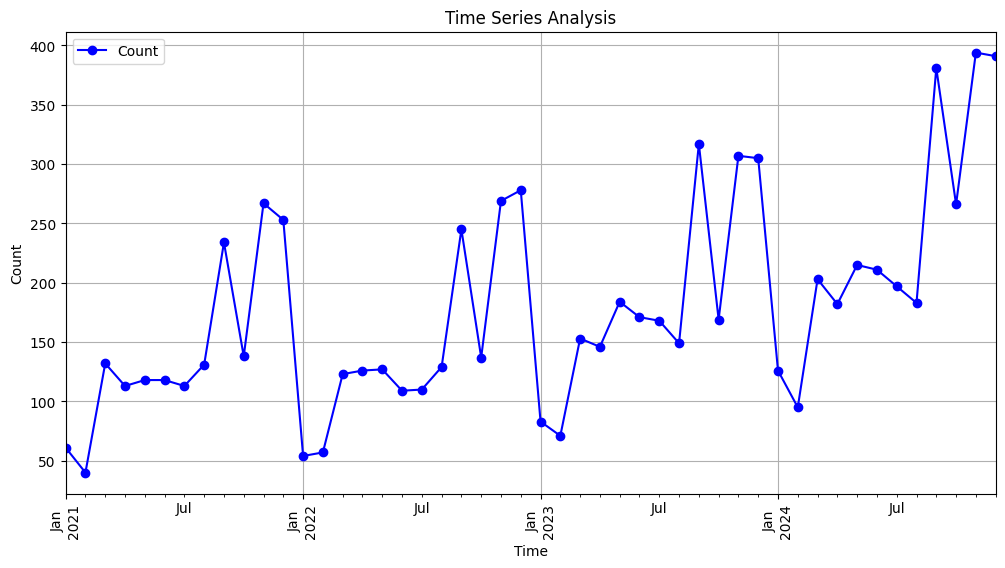

In [96]:

# Réinitialiser l'index pour convertir en un format utilisable pour une série temporelle
pivot.reset_index(inplace=True)

# Fusionner 'orderyear' et 'month_name' pour créer un index temporel
pivot_melted = pivot.melt(id_vars='orderyear', var_name='month_name', value_name='count')
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
pivot_melted['month'] = pivot_melted['month_name'].apply(lambda x: month_order.index(x) + 1)
pivot_melted['date'] = pd.to_datetime(pivot_melted['orderyear'] + '-' + pivot_melted['month'].astype(str))

# Trier par date
pivot_melted = pivot_melted.sort_values('date')

# Créer une série temporelle
time_series = pivot_melted.set_index('date')['count']

# Tracer la série temporelle
plt.figure(figsize=(12, 6))
time_series.plot(marker='o', linestyle='-', color='b', label='Count')
plt.title('Time Series Analysis')
plt.ylabel('Count')
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_971/2930745008.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = time_series.resample('Q').mean()


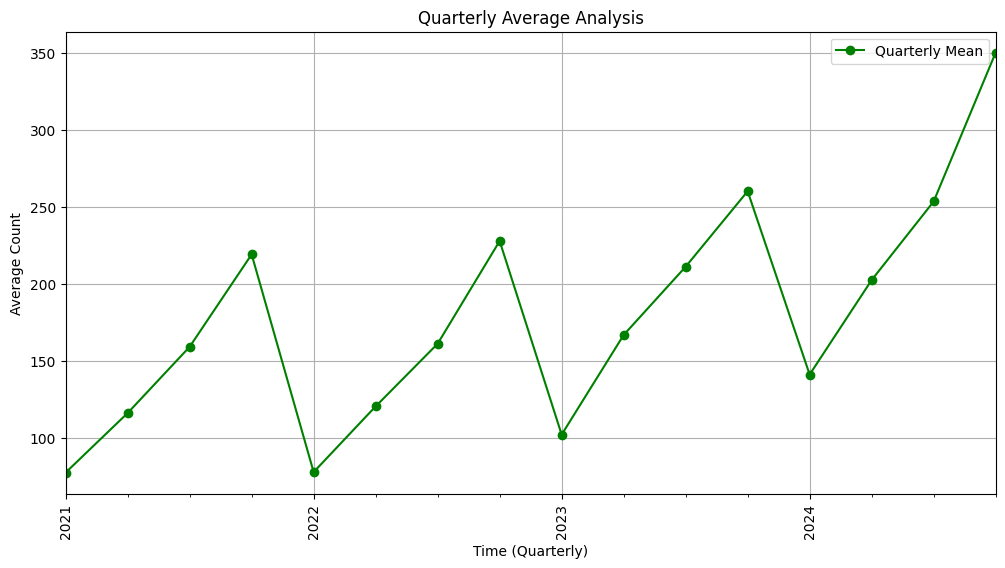

In [97]:
# Grouper par trimestre et calculer la moyenne
quarterly_data = time_series.resample('Q').mean()

# Tracer le graphique
plt.figure(figsize=(12, 6))
quarterly_data.plot(marker='o', linestyle='-', color='g', label='Quarterly Mean')

# Configurer le graphique
plt.title('Quarterly Average Analysis')
plt.ylabel('Average Count')
plt.xlabel('Time (Quarterly)')
plt.grid(True)
plt.legend()

# Afficher toutes les abscisses et les pivoter
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


/tmp/ipykernel_971/1178665808.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(
/tmp/ipykernel_971/1178665808.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(
/tmp/ipykernel_971/1178665808.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(


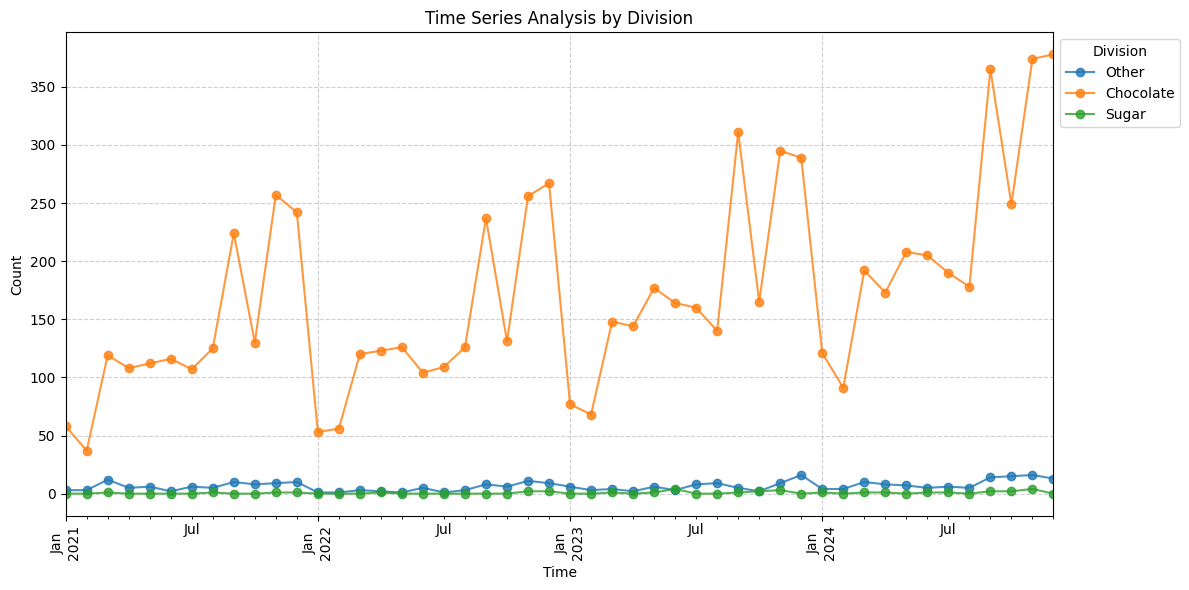

In [98]:
colors = plt.cm.tab10(range(len(df['division'].unique())))

plt.figure(figsize=(12, 6))

# Boucle pour chaque division
for i, division in enumerate(df['division'].unique()):
    # Filtrer les données pour la division actuelle
    filtered_df = df[df['division'] == division]

    # Pivot table
    pivot = filtered_df.pivot_table(
        values='count',  
        index='orderyear',     
        columns='month_name',     
        aggfunc='sum'         
    ).fillna(0)  # Remplacer les valeurs manquantes par 0
    
    # Réinitialiser l'index pour convertir en un format utilisable pour une série temporelle
    pivot.reset_index(inplace=True)

    # Fusionner 'orderyear' et 'month_name' pour créer un index temporel
    pivot_melted = pivot.melt(id_vars='orderyear', var_name='month_name', value_name='count')
    month_order = [
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ]
    pivot_melted['month'] = pivot_melted['month_name'].apply(lambda x: month_order.index(x) + 1)
    pivot_melted['date'] = pd.to_datetime(pivot_melted['orderyear'].astype(str) + '-' + pivot_melted['month'].astype(str))

    # Trier par date
    pivot_melted = pivot_melted.sort_values('date')

    # Créer une série temporelle
    time_series = pivot_melted.set_index('date')['count']

    # Tracer la série temporelle
    time_series.plot(
        marker='o', 
        linestyle='-', 
        color=colors[i], 
        label=division, 
        alpha=0.8
    )

# Configurer le graphique
plt.title('Time Series Analysis by Division')
plt.ylabel('Count')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Division', loc='upper left', bbox_to_anchor=(1, 1))  # Légende hors du graphique
plt.xticks(rotation=90)
plt.tight_layout()  # Ajuster les marges pour éviter le chevauchement

# Afficher le graphique
plt.show()


/tmp/ipykernel_971/202235900.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(
/tmp/ipykernel_971/202235900.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(


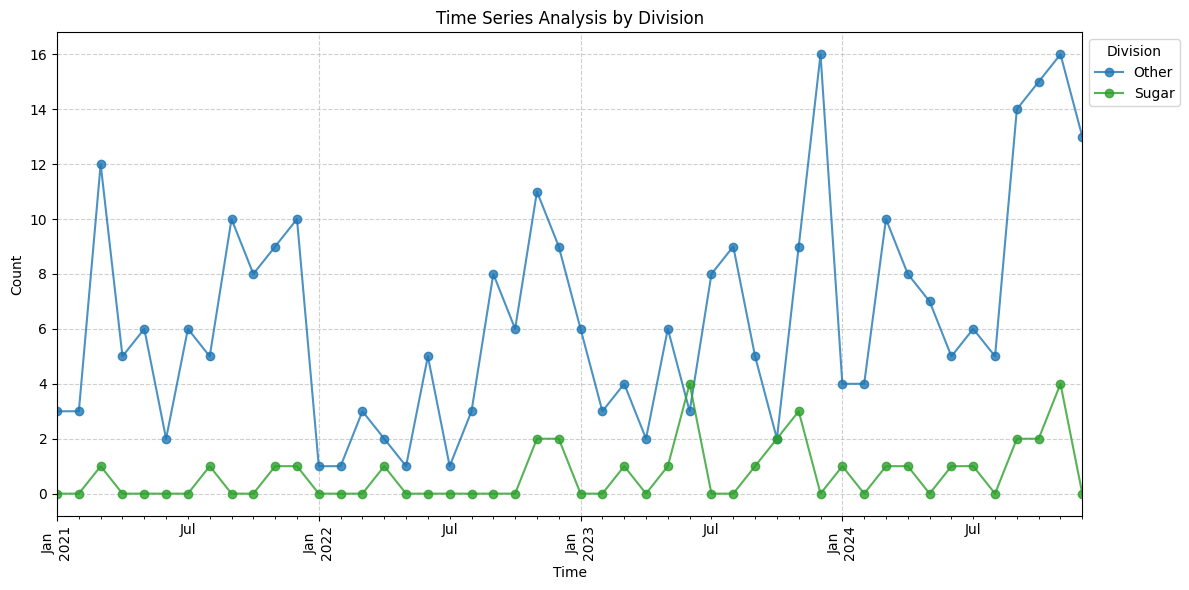

In [99]:
plt.figure(figsize=(12, 6))

# Boucle pour chaque division
for i, division in enumerate(df['division'].unique()) :
    # Filtrer les données pour la division actuelle
    if division=='Chocolate' : continue
    filtered_df = df[df['division'] == division]

    # Pivot table
    pivot = filtered_df.pivot_table(
        values='count',  
        index='orderyear',     
        columns='month_name',     
        aggfunc='sum'         
    ).fillna(0)  # Remplacer les valeurs manquantes par 0
    
    # Réinitialiser l'index pour convertir en un format utilisable pour une série temporelle
    pivot.reset_index(inplace=True)

    # Fusionner 'orderyear' et 'month_name' pour créer un index temporel
    pivot_melted = pivot.melt(id_vars='orderyear', var_name='month_name', value_name='count')
    month_order = [
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December"
    ]
    pivot_melted['month'] = pivot_melted['month_name'].apply(lambda x: month_order.index(x) + 1)
    pivot_melted['date'] = pd.to_datetime(pivot_melted['orderyear'].astype(str) + '-' + pivot_melted['month'].astype(str))

    # Trier par date
    pivot_melted = pivot_melted.sort_values('date')

    # Créer une série temporelle
    time_series = pivot_melted.set_index('date')['count']

    # Tracer la série temporelle
    time_series.plot(
        marker='o', 
        linestyle='-', 
        color=colors[i], 
        label=division, 
        alpha=0.8
    )

# Configurer le graphique
plt.title('Time Series Analysis by Division')
plt.ylabel('Count')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Division', loc='upper left', bbox_to_anchor=(1, 1))  # Légende hors du graphique
plt.xticks(rotation=90)
plt.tight_layout()  # Ajuster les marges pour éviter le chevauchement

# Afficher le graphique
plt.show()


In [100]:
chocolate = df[df['division'] =='Chocolate']

<Axes: xlabel='region', ylabel='Count'>

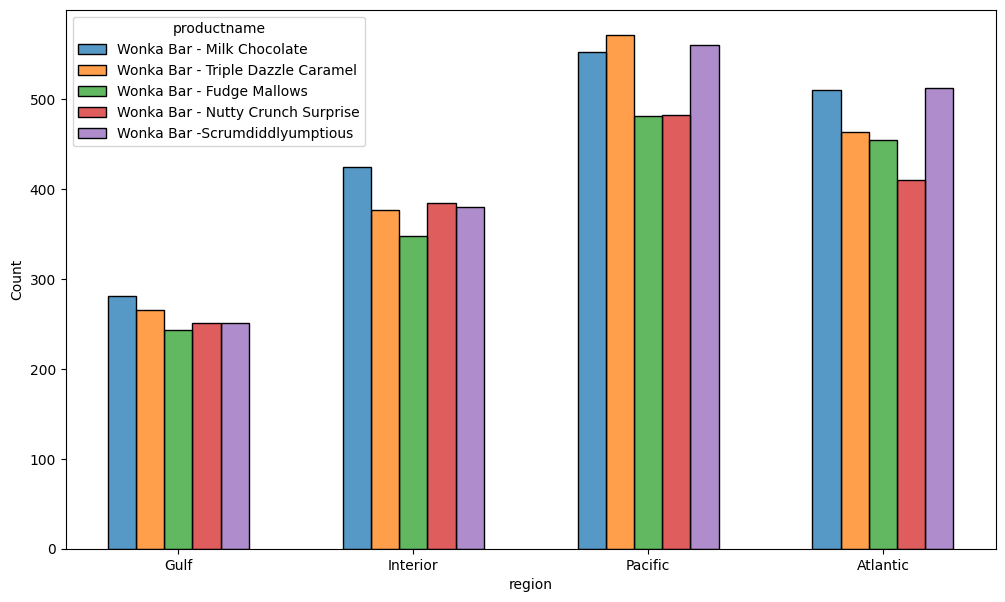

In [121]:
plt.figure(figsize=(12, 7))
sns.histplot(chocolate, x='region' ,  hue='productname', shrink=0.6,  multiple="dodge")

<Axes: xlabel='region', ylabel='distances'>

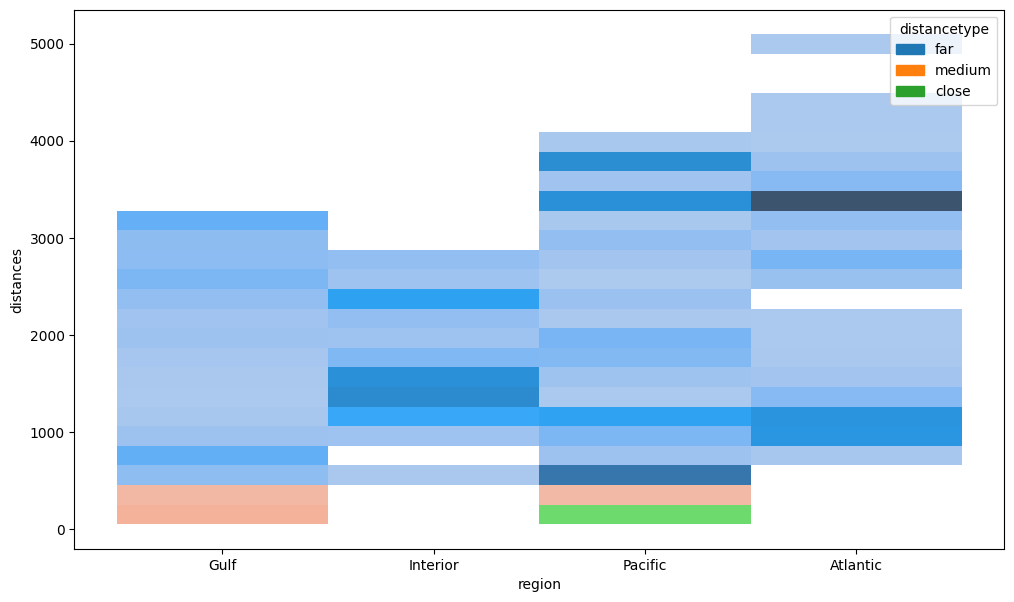

In [120]:
plt.figure(figsize=(12, 7))
sns.histplot(chocolate, x='region' ,  y='distances', hue='distancetype',  shrink=0.6)

<Axes: xlabel='region', ylabel='Count'>

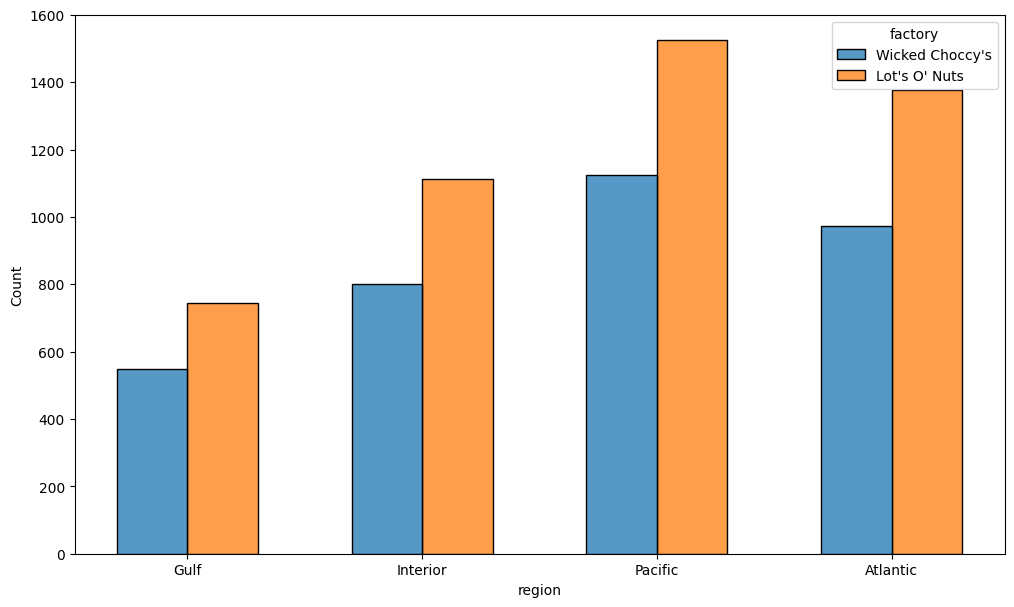

In [123]:
plt.figure(figsize=(12, 7))
sns.histplot(chocolate, x='region' ,  hue='factory', shrink=0.6,  multiple="dodge")

In [125]:
import pandas as pd

# Données fournies
data = {
    "Division": [
        "Chocolate", "Chocolate", "Chocolate", "Chocolate", "Chocolate", 
        "Sugar", "Sugar", "Sugar", "Sugar", "Other", 
        "Sugar", "Sugar", "Other", "Other", "Other"
    ],
    "Product Name": [
        "Wonka Bar - Nutty Crunch Surprise", "Wonka Bar - Fudge Mallows", "Wonka Bar -Scrumdiddlyumptious",
        "Wonka Bar - Milk Chocolate", "Wonka Bar - Triple Dazzle Caramel", "Laffy Taffy", "SweeTARTS", 
        "Nerds", "Fun Dip", "Fizzy Lifting Drinks", "Everlasting Gobstopper", "Hair Toffee", 
        "Lickable Wallpaper", "Wonka Gum", "Kazookles"
    ],
    "Factory": [
        "Lot's O' Nuts", "Lot's O' Nuts", "Lot's O' Nuts", 
        "Wicked Choccy's", "Wicked Choccy's", "Sugar Shack", "Sugar Shack", 
        "Sugar Shack", "Sugar Shack", "Sugar Shack", "Secret Factory", 
        "The Other Factory", "Secret Factory", "Secret Factory", "The Other Factory"
    ],
    "Product ID": [
        "CHO-NUT-13000", "CHO-FUD-51000", "CHO-SCR-58000", 
        "CHO-MIL-31000", "CHO-TRI-54000", "SUG-LAF-25000", "SUG-SWE-91000", 
        "SUG-NER-92000", "SUG-FUN-75000", "OTH-FIZ-56000", "SUG-EVE-47000", 
        "SUG-HAI-55000", "OTH-LIC-15000", "OTH-GUM-21000", "OTH-KAZ-38000"
    ],
    "Unit Price": [3.49, 3.6, 3.6, 3.25, 3.75, 1.99, 1.5, 1.5, 1.5, 3.75, 10, 4.5, 20, 1.25, 3.25],
    "Unit Cost": [1, 1.2, 1.1, 1.14, 1.3, 0.75, 0.8, 0.8, 0.9, 1.5, 2, 1, 10, 0.6, 3]
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Mapping des usines aux régions
factory_to_region = {
    "Lot's O' Nuts": "Atlantic",
    "Wicked Choccy's": "Golf",
    "Sugar Shack": "Ontario",
    "Secret Factory": "Pacific",
    "The Other Factory": "Midwest"
}

# Ajouter la colonne 'Region'
df['Region'] = df['Factory'].map(factory_to_region)

# Afficher le DataFrame mis à jour
df

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost,Region
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00,Atlantic
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20,Atlantic
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10,Atlantic
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14,Golf
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30,Golf
5,Sugar,Laffy Taffy,Sugar Shack,SUG-LAF-25000,1.99,0.75,Ontario
6,Sugar,SweeTARTS,Sugar Shack,SUG-SWE-91000,1.50,0.80,Ontario
7,Sugar,Nerds,Sugar Shack,SUG-NER-92000,1.50,0.80,Ontario
8,Sugar,Fun Dip,Sugar Shack,SUG-FUN-75000,1.50,0.90,Ontario
9,Other,Fizzy Lifting Drinks,Sugar Shack,OTH-FIZ-56000,3.75,1.50,Ontario


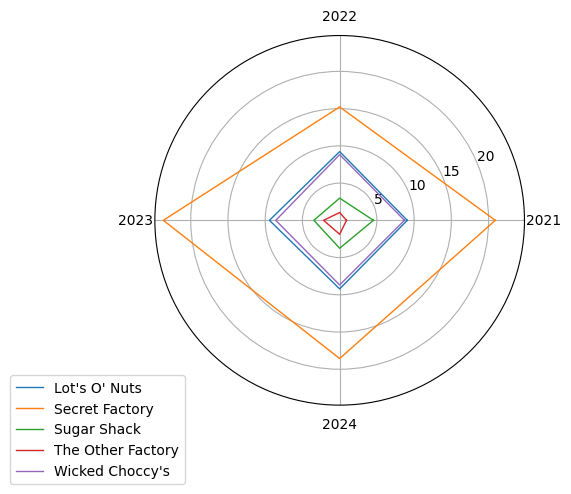

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

data = {
    'orderyear': [2021, 2022, 2023, 2024],
    'Lot\'s O\' Nuts': [9.08, 9.23, 9.43, 9.21],
    'Secret Factory': [20.90, 15.23, 23.68, 18.56],
    'Sugar Shack': [4.54, 2.98, 3.47, 3.75],
    'The Other Factory': [0.92, 1.05, 2.16, 1.87],
    'Wicked Choccy\'s': [8.70, 8.82, 8.58, 8.68]
}

df = pd.DataFrame(data)
categories = list(df['orderyear'])
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)

# Ajout des valeurs pour chaque usine
factories = list(df.columns)[1:]
for factory in factories:
    values = df[factory].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=factory)

plt.xticks(angles[:-1], categories)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


In [104]:
database = df[(df['region']=='Pacific' ) & ( df['factory']=="Lot's O' Nuts"  ) & (
    df['distancetype'] == 'close'
) ]
X = df['orderyear'].unique().tolist()
H = [  len( database[database['orderyear']==x] ) for x in X   ]
plt.bar(
    x=X,height=H,
) ; 

KeyError: 'region'

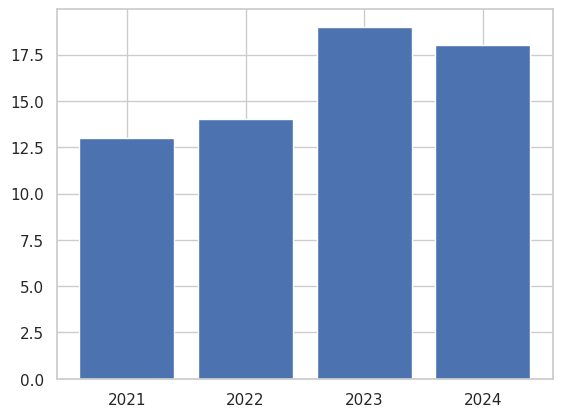

In [240]:
database = df[(df['region']=='Pacific' ) & ( df['factory']=="Lot's O' Nuts"  ) & (
    df['distancetype'] == 'medium'
) ]
X = df['orderyear'].unique().tolist()
H = [  len( database[database['orderyear']==x] ) for x in X   ]
plt.bar(
    x=X,height=H,
) ; 

In [31]:
df['orderyear'] = df['orderyear'].astype(str)
g = df[ 
    (df['orderyear'] == '2021') & 
    (df['factory']=="Secret Factory") & 
    #(df['division'] == "Chocolate" ) & 
    (df['distancetype']=='far' ) & 
    (df['region'] == 'Atlantic' )    

]

In [37]:
len(g)

14

<Axes: xlabel='orderyear', ylabel='Count'>

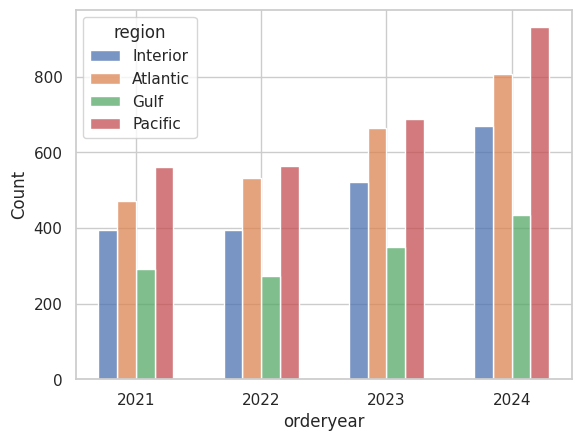

In [298]:
sns.histplot(
    df , x='orderyear' ,  hue='region', shrink=0.6,  multiple="dodge",
)

NameError: name 'H' is not defined

/tmp/ipykernel_971/1749638675.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(


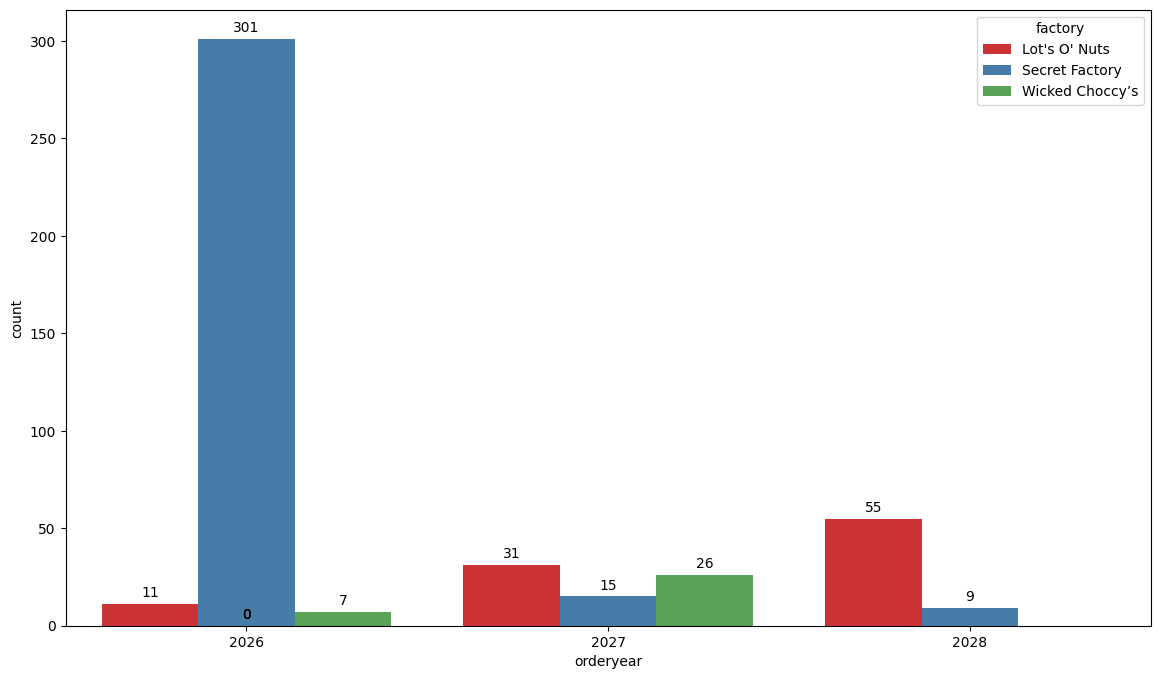

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données (remplacez par vos données réelles)
# Exemple fictif de structure des données
data = {
    'orderyear': [2026, 2026, 2026, 2027, 2027, 2027, 2028, 2028],
    'factory': ["Lot's O' Nuts", 'Secret Factory', 'Wicked Choccy’s', "Lot's O' Nuts", 'Secret Factory', 'Wicked Choccy’s', "Lot's O' Nuts", 'Secret Factory'],
    'distancetype': ['good', 'medium', 'weak', 'good', 'medium', 'weak', 'good', 'medium'],
    'count': [11, 301, 7, 31, 15, 26, 55, 9],
}

df_ = pd.DataFrame(data)


# Taille de la figure
plt.figure(figsize=(14, 8))

# Création du graphique à barres
bar_plot = sns.barplot(
    data=df_,
    x='orderyear',
    y='count',
    hue='factory',
    ci=None,
    palette='Set1'
)

# Ajouter les annotations sur chaque barre
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='center',
        size=10,
        xytext=(0, 8),
        textcoords='offset points'
    )


# Afficher le graphique
plt.show()
